In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [8]:
train=pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [9]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
combi=train.append(test,ignore_index=True,sort=False)

In [14]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt

In [15]:
#removing the twitter handles@
combi['clean_tweets']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [16]:
#removing punctuations
combi['clean_tweets']=combi['clean_tweets'].str.replace("[^a-zA-Z#]", " ")

In [17]:
#removing short words
combi['clean_tweets'] = combi['clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [18]:
combi.head()

,id,label,tweet,clean_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [20]:
tokenized_tweet=combi['clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweets, dtype: object

In [21]:
from nltk.stem.porter import*
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i)for i in x] )
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweets, dtype: object

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=''.join(tokenized_tweet[i])
combi['clean_tweets']=tokenized_tweet

In [24]:
combi.head()

,id,label,tweet,clean_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,whenfatherdysfunctselfishdragkidintodysfunct#run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank#lyftcreditcaustheyofferwheelchairvan#dis...
2,3,0.0,bihday your majesty,bihdayyourmajesti
3,4,0.0,#model i love u take with u all the time in ...,#modellovetakewithtime
4,5,0.0,factsguide: society now #motivation,factsguidsocieti#motiv


In [30]:
def extract_hashtag(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)", i)
        hashtags.append(ht);
    return hashtags

In [31]:
ht_normal=extract_hashtag(combi['clean_tweets'][combi['label']==0])
ht_negative=extract_hashtag(combi['clean_tweets'][combi['label']==1])
ht_normal=sum(ht_normal,[])
ht_negative=sum(ht_negative,[])

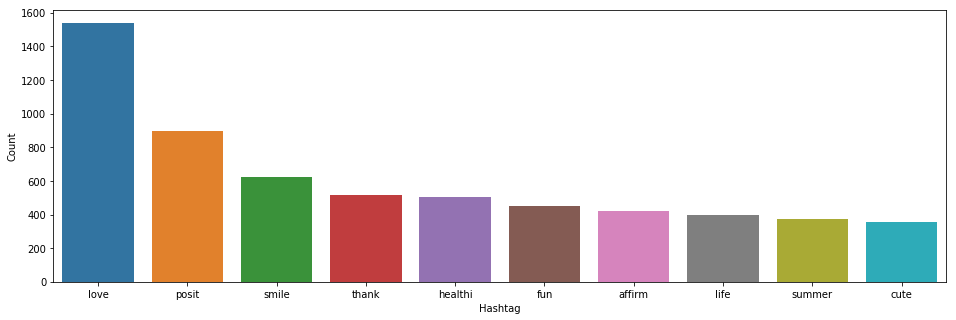

In [32]:
a = nltk.FreqDist(ht_normal)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

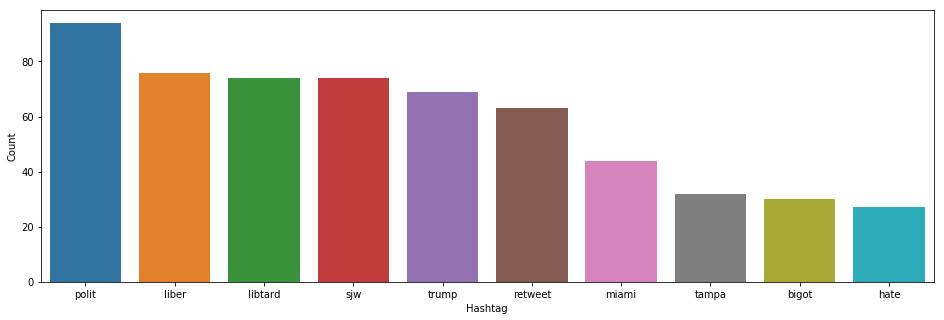

In [33]:
b=nltk.FreqDist(ht_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e=e.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['clean_tweets'])
print(bow)

  (0, 737)	1
  (1, 865)	1
  (3, 577)	1
  (4, 587)	1
  (7, 339)	1
  (7, 5)	1
  (7, 437)	1
  (7, 391)	1
  (7, 751)	1
  (10, 308)	1
  (10, 345)	1
  (10, 777)	1
  (10, 86)	1
  (11, 530)	1
  (11, 396)	1
  (11, 636)	1
  (11, 634)	1
  (13, 850)	1
  (14, 756)	1
  (14, 43)	1
  (15, 628)	1
  (15, 359)	1
  (16, 680)	1
  (16, 865)	1
  (21, 488)	1
  :	:
  (49145, 831)	1
  (49147, 497)	1
  (49148, 851)	1
  (49148, 590)	1
  (49149, 506)	1
  (49150, 102)	1
  (49151, 451)	1
  (49151, 450)	1
  (49151, 680)	1
  (49152, 690)	1
  (49152, 313)	1
  (49153, 943)	1
  (49154, 916)	1
  (49154, 874)	1
  (49154, 85)	1
  (49154, 901)	1
  (49154, 492)	1
  (49154, 675)	1
  (49154, 104)	1
  (49155, 223)	1
  (49155, 944)	1
  (49156, 409)	1
  (49157, 572)	1
  (49157, 972)	1
  (49157, 387)	1


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [42]:
train_bow= bow[:31962,:]
test_bow = bow[31962:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [43]:
#training the model
lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
prediction=lreg.predict_proba(xvalid_bow)
print(prediction)

[[0.92172178 0.07827822]
 [0.956741   0.043259  ]
 [0.98178931 0.01821069]
 ...
 [0.9566179  0.0433821 ]
 [0.88118499 0.11881501]
 [0.97552808 0.02447192]]


In [45]:
prediction_int=prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score

0.42731277533039647

In [47]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [48]:
print(test_pred_int)

[0 0 0 ... 0 0 0]
